In [1]:
import sys
import os
import random
import zipfile
import nibabel as nib 
import numpy as np


In [3]:
def view_data(data, img):
    # Display the image using nibabel's viewer
    img = nib.Nifti1Image(data, img.affine, img.header)
    nib.viewers.OrthoSlicer3D(data)

In [2]:
img_path = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_CroppedCases1/case_00691/imaging.nii.gz"
img = nib.load(img_path)
data = img.get_fdata()
nx, ny, nz = data.shape

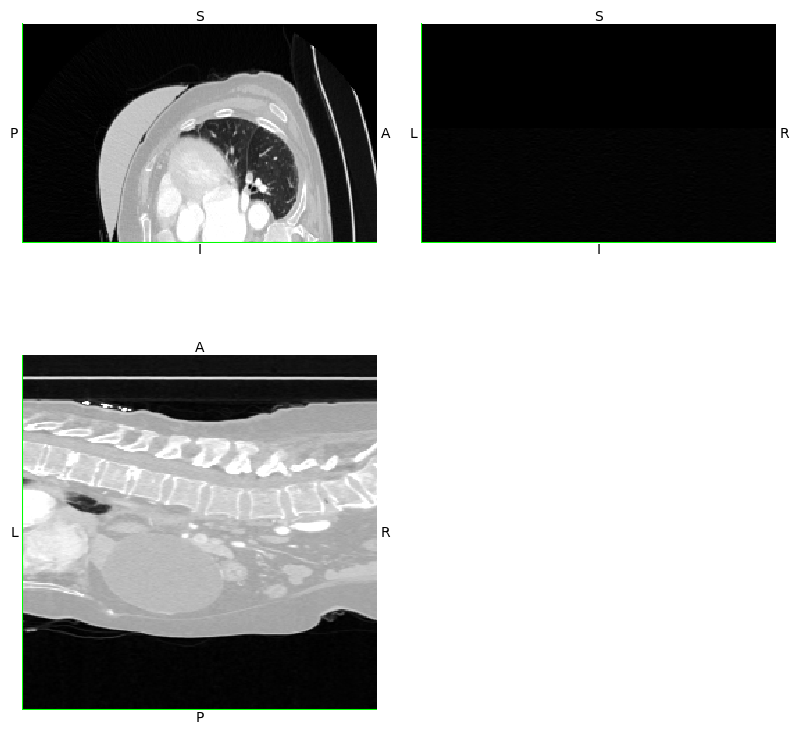

In [4]:
view_data(data, img)

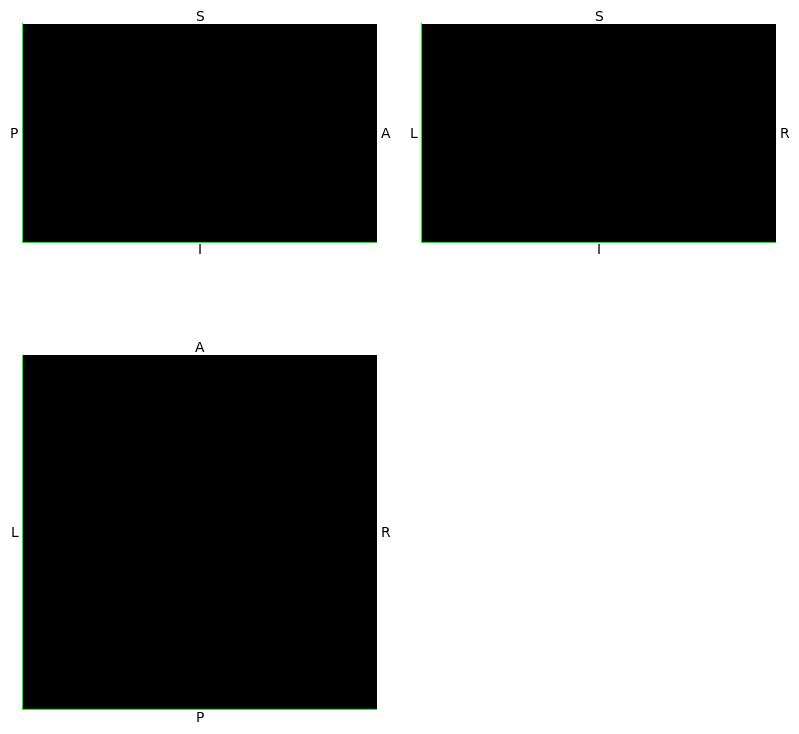

In [5]:
seg_path = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_CroppedCases1/case_00691/segmentation.nii.gz"
seg = nib.load(seg_path)
seg_data = seg.get_fdata()
view_data(seg_data, seg)

In [8]:
print(seg_data.shape)

(256, 256, 158)


In [11]:
seg_data[:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
i=0
for slice in seg_data[:,:,]:
    if slice.max() > 0:
        i+=1
print(i,len(seg_data[:,:,0]))

130 256


In [25]:
def crop_data(data, seg_data):
    # Crop the data to the bounding box of the segmentation
    x, y, z = np.where(seg_data)
    if x.size > 0 and y.size > 0 and z.size > 0:
        x_min, x_max = x.min(), x.max()
        y_min, y_max = y.min(), y.max()
        z_min, z_max = z.min(), z.max()
        return data[x_min:x_max,:,:], seg_data[x_min:x_max,:, :]
    else:
        print("Warning: seg_data does not contain any non-zero values.")
        return data, seg_data

In [21]:
img_crop, seg_crop = crop_data(data, seg_data)

In [22]:
nib.save(nib.Nifti1Image(img_crop, img.affine, img.header),"img_crop691.nii.gz")
nib.save(nib.Nifti1Image(seg_crop, seg.affine, seg.header), "seg_crop691.nii.gz")

In [27]:
input_dir = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_CroppedCases1/"
subdirs = [os.path.join(input_dir, d) for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
i =0
for subdir in subdirs:
    case = subdir.split("/")[-1]
    i+=1
    print(i, case)
    img_path = os.path.join(subdir, "imaging.nii.gz")
    seg_path = os.path.join(subdir, "segmentation.nii.gz")
    seg = nib.load(seg_path)
    img = nib.load(img_path)
    seg_data = seg.get_fdata()
    data = img.get_fdata()
    dir = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_CroppedMasked/"
    if not os.path.exists(os.path.join(dir, case)):
        os.makedirs(os.path.join(dir, case))
    img_crop, seg_crop = crop_data(data, seg_data)
    nib.save(nib.Nifti1Image(img_crop, img.affine, img.header), os.path.join(dir, case, "imaging.nii.gz"))
    nib.save(nib.Nifti1Image(seg_crop, seg.affine, seg.header), os.path.join(dir, case, "segmentation.nii.gz"))

1 case_00179
2 case_00146
3 case_00710
4 case_01060
5 case_01058
6 case_00728
7 case_01067
8 case_00989
9 case_00525
10 case_00141
11 case_00183
12 case_01051
13 case_00177
14 case_00721
15 case_00513
16 case_00514
17 case_00170
18 case_00184
19 case_00772
20 case_00540
21 case_00124
22 case_01002
23 case_00786
24 case_00781
25 case_00547
26 case_00585
27 case_00115
28 case_00788
29 case_00112
30 case_00576
31 case_00549
32 case_01068
33 case_00718
34 case_00171
35 case_00176
36 case_00512
37 case_00720
38 case_00182
39 case_01050
40 case_01059
41 case_00524
42 case_00716
43 case_01092
44 case_01066
45 case_00178
46 case_01061
47 case_01095
48 case_00147
49 case_00583
50 case_00113
51 case_00577
52 case_00548
53 case_00742
54 case_00570
55 case_00114
56 case_01032
57 case_00584
58 case_01004
59 case_01003
60 case_00541
61 case_00773
62 case_00125
63 case_00854
64 case_00068
65 case_00265
66 case_00057
67 case_00433
68 case_00601
69 case_00291
70 case_01149
71 case_00853
72 case_00296
7